<a href="https://colab.research.google.com/github/GyanendraChaubey/Python-Tutorials/blob/main/Time_Series_Analysis_Tractor_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Time Series
 1. Data time dependent
 2. info, describe, plot, mean, median
 3. Transformation, difference, outliers
 4. Statitical model: AR(p) I(d) MA(q), SARIMA, FBProphet
 5. DL: NLP(RNN, LSTM)
 6. Evaluation: AIC/BIC

2.  Things to analyze:
 1. Trend
 2. Seasonality
 3. Cycle
 4. Irregular Pattern/ Noise/ Randomness

3. Two kinds of Time Series:
 1. Additive Time Series: It would be like Arithmetic Time Series
 2. Multiplicative Time Series


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/PH-Sales.csv")

In [ ]:
dataset.head(12)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
5,Jun-03,189
6,Jul-03,207
7,Aug-03,207
8,Sep-03,171
9,Oct-03,150


In [ ]:
len(dataset['Month-Year'])

144

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
pd.date_range(start='1/1/2018', periods=8)


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(start='2022-07-30',periods=7)

DatetimeIndex(['2022-07-30', '2022-07-31', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

In [ ]:
len(dates)

144

In [ ]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

M-31
MS-1

In [ ]:
2003-2014==144

False

In [ ]:
pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [ ]:
dates.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', length=144)

In [ ]:
dates.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', length=144)

In [ ]:
dataset['month']=dates.month

In [ ]:
dataset['year']=dates.year

In [ ]:
dataset

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
...,...,...,...,...
139,Aug-14,848,8,2014
140,Sep-14,640,9,2014
141,Oct-14,581,10,2014
142,Nov-14,519,11,2014


In [ ]:
apply(lambda x: calendar.month_abbr[x])

NameError: ignored

In [ ]:
dataset['Month']

In [ ]:
import calendar
calendar.month_abbr[1]

'Jan'

In [ ]:
dataset['month'] = dataset['month'].apply(lambda x: calendar.month_abbr[x])


In [ ]:
dataset.head(12)

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003
5,Jun-03,189,Jun,2003
6,Jul-03,207,Jul,2003
7,Aug-03,207,Aug,2003
8,Sep-03,171,Sep,2003
9,Oct-03,150,Oct,2003


In [ ]:
dataset.rename(columns={"Number of Tractor Sold":"Tractor-Sales"},inplace=True)

In [ ]:
dataset.head()

,Month-Year,Tractor-Sales,month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [ ]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [ ]:
dataset.set_index(dates,inplace=True)

In [ ]:
dataset

,Month-Year,Tractor-Sales,month,year
2003-01-01,Jan-03,141,Jan,2003
2003-02-01,Feb-03,157,Feb,2003
2003-03-01,Mar-03,185,Mar,2003
2003-04-01,Apr-03,199,Apr,2003
2003-05-01,May-03,203,May,2003
...,...,...,...,...
2014-08-01,Aug-14,848,Aug,2014
2014-09-01,Sep-14,640,Sep,2014
2014-10-01,Oct-14,581,Oct,2014
2014-11-01,Nov-14,519,Nov,2014


In [ ]:
dataset=dataset[["Tractor-Sales","month","year"]]

In [ ]:
dataset.head(12)

,Tractor-Sales,month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003
2003-06-01,189,Jun,2003
2003-07-01,207,Jul,2003
2003-08-01,207,Aug,2003
2003-09-01,171,Sep,2003
2003-10-01,150,Oct,2003


In [ ]:
ts_sales=dataset['Tractor-Sales']

In [ ]:
ts_sales[0:1]

2003-01-01    141
Freq: MS, Name: Tractor-Sales, dtype: int64

In [ ]:
ts_sales[1]

157

In [ ]:
y=mx+c

NameError: ignored

In [ ]:
157=0.2*141+5

SyntaxError: ignored

In [ ]:
ts_sales[6]

207

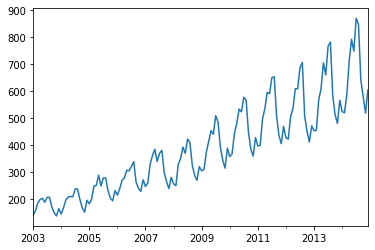

In [ ]:
ts_sales.plot()

In [ ]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

In [ ]:
#decompose
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
decompose=seasonal_decompose(ts_sales)

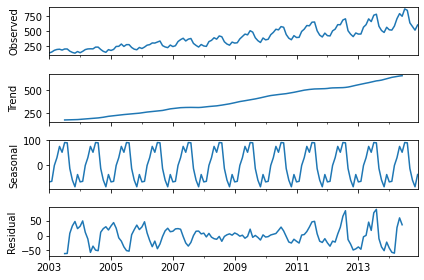

In [ ]:
decompose.plot();

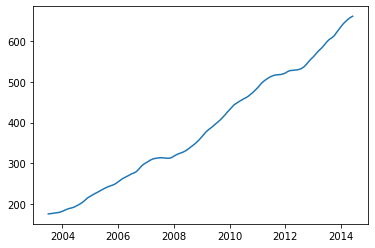

In [ ]:
plt.plot(decompose.trend)

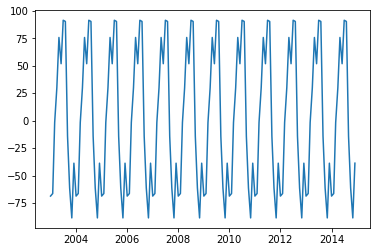

In [ ]:
plt.plot(decompose.seasonal)

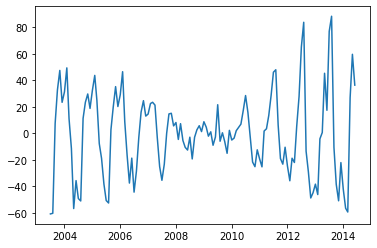

In [ ]:
plt.plot(decompose.resid)

In [ ]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

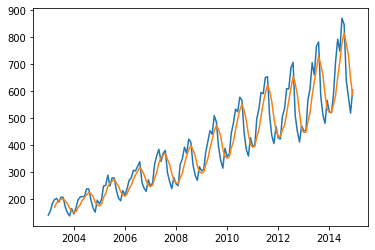

In [ ]:
#rolling stats
#simple moving average
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=4).mean())

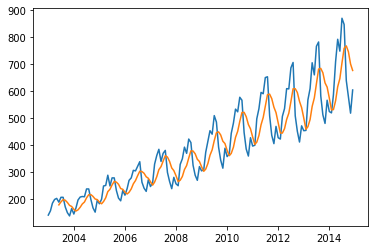

In [ ]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=6).mean())

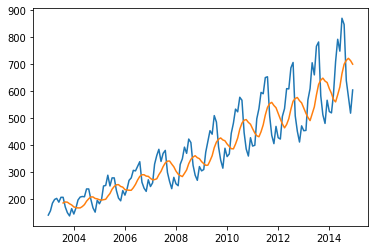

In [ ]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=8).mean())

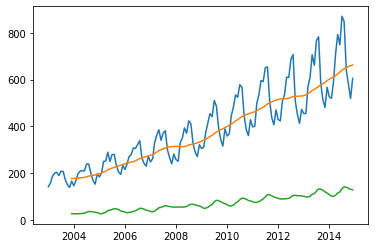

In [ ]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=12).mean())
plt.plot(ts_sales.rolling(window=12).std())

In [ ]:
#some more visualizations
dataset.head(12)

,Tractor-Sales,month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003
2003-06-01,189,Jun,2003
2003-07-01,207,Jul,2003
2003-08-01,207,Aug,2003
2003-09-01,171,Sep,2003
2003-10-01,150,Oct,2003


In [ ]:
updated_dataset=pd.pivot(dataset,index='month',values='Tractor-Sales',columns='year')

In [ ]:
updated_dataset

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


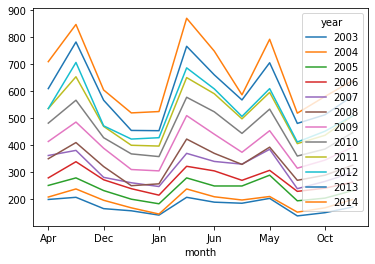

In [ ]:
updated_dataset.plot()

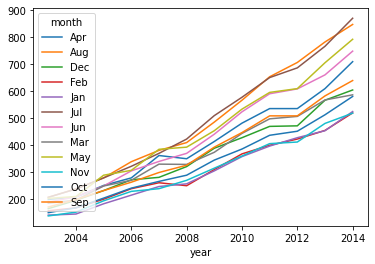

In [ ]:
pd.pivot(dataset,index='year',values='Tractor-Sales',columns='month').plot()

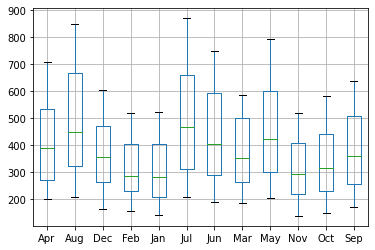

In [ ]:
pd.pivot(dataset,index='year',values='Tractor-Sales',columns='month').boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


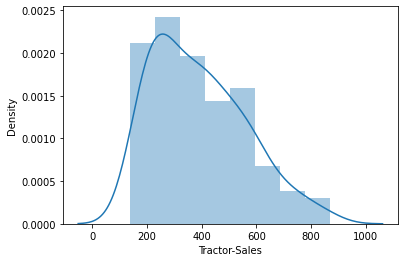

In [ ]:
import seaborn as sns
sns.distplot(ts_sales)

In [ ]:
#Ad (Augmented-Dicky) Fuller Test
from statsmodels.tsa.stattools import adfuller
adfuller(ts_sales)

(1.1088250591467341,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '10%': -2.578864381347275,
  '5%': -2.8842185101614626},
 1082.5357724796872)

In [ ]:
def test_stationary(timeseries):
  rollmean=timeseries.rolling(12).mean()
  rollstd=timeseries.rolling(12).std()
  plt.figure(figsize=(18,10))
  plt.grid('both')
  plt.plot(timeseries)
  plt.plot(rollmean,label='rol_mean')
  plt.plot(rollstd,label='rol_std')

  print("---------------------------")
  print("Augmented Dicky Fuller")
  print("Result of Dicky Fuller Test")
  dftest=adfuller(timeseries,autolag='AIC')
  dfoutput=pd.Series(dftest[0:4],index=['Test Statitic','p-value','#lags_used','Number of observations'])
  for key, value in dftest[4].items():
    dfoutput['Confidence Interval (%s)'%key]=value
  print(dfoutput)

---------------------------
Augmented Dicky Fuller
Result of Dicky Fuller Test
Test Statitic                  1.108825
p-value                        0.995291
#lags_used                    14.000000
Number of observations       129.000000
Confidence Interval (1%)      -3.482088
Confidence Interval (5%)      -2.884219
Confidence Interval (10%)     -2.578864
dtype: float64


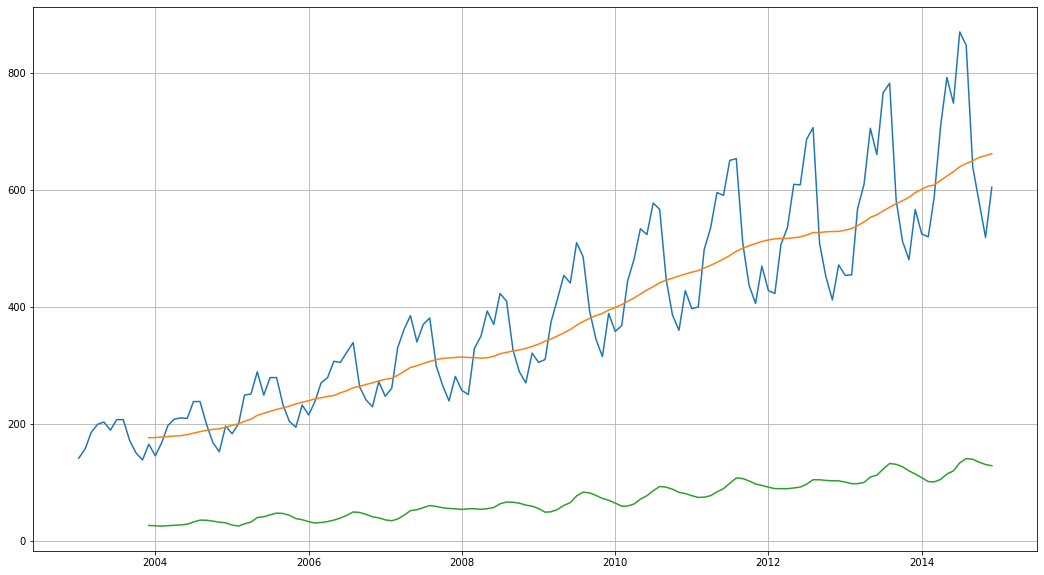

In [ ]:
test_stationary(ts_sales)

---------------------------
Augmented Dicky Fuller
Result of Dicky Fuller Test
Test Statitic                 -2.543481
p-value                        0.105250
#lags_used                    14.000000
Number of observations       128.000000
Confidence Interval (1%)      -3.482501
Confidence Interval (5%)      -2.884398
Confidence Interval (10%)     -2.578960
dtype: float64


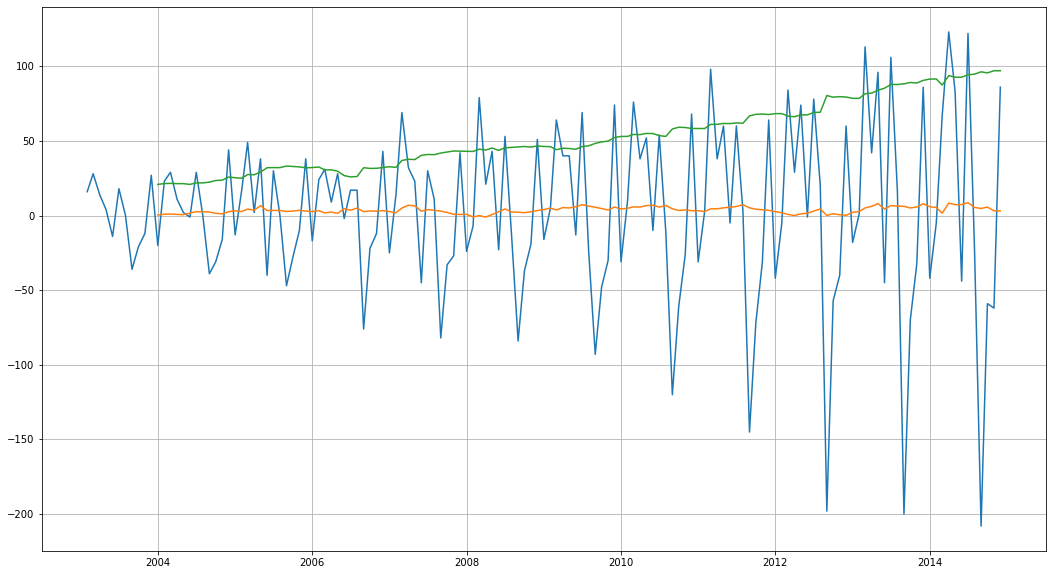

In [ ]:
#differencing
one_diff_data=ts_sales.diff(periods=1)
one_diff_data.dropna(inplace=True)
test_stationary(one_diff_data)

In [ ]:
import numpy as np
log_diff_data=np.log(ts_sales).diff(periods=1).dropna()

---------------------------
Augmented Dicky Fuller
Result of Dicky Fuller Test
Test Statitic                 -2.680467
p-value                        0.077480
#lags_used                    14.000000
Number of observations       128.000000
Confidence Interval (1%)      -3.482501
Confidence Interval (5%)      -2.884398
Confidence Interval (10%)     -2.578960
dtype: float64


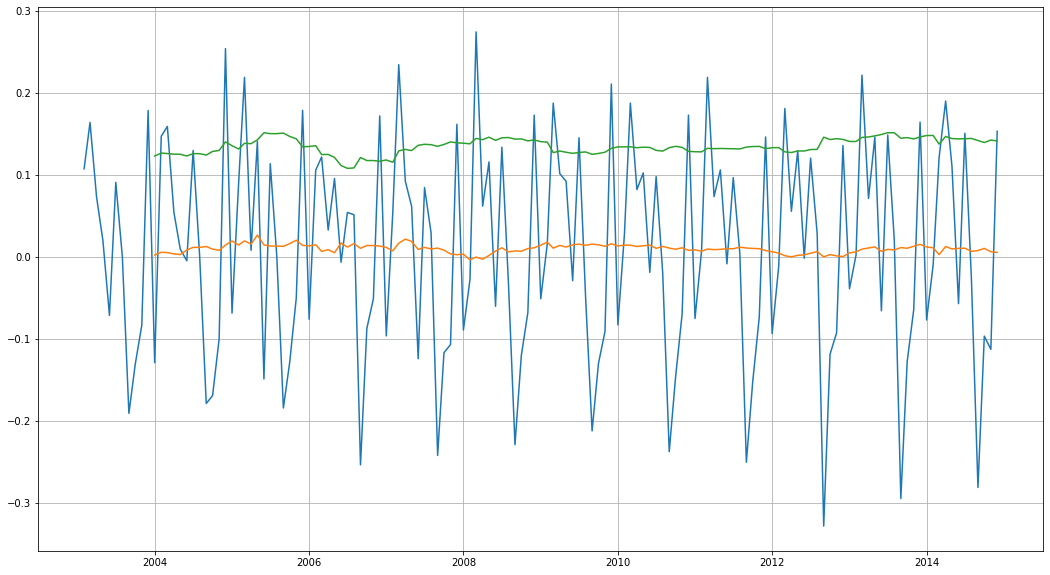

In [ ]:
test_stationary(log_diff_data)

---------------------------
Augmented Dicky Fuller
Result of Dicky Fuller Test
Test Statitic                 -3.200722
p-value                        0.019943
#lags_used                    11.000000
Number of observations       130.000000
Confidence Interval (1%)      -3.481682
Confidence Interval (5%)      -2.884042
Confidence Interval (10%)     -2.578770
dtype: float64


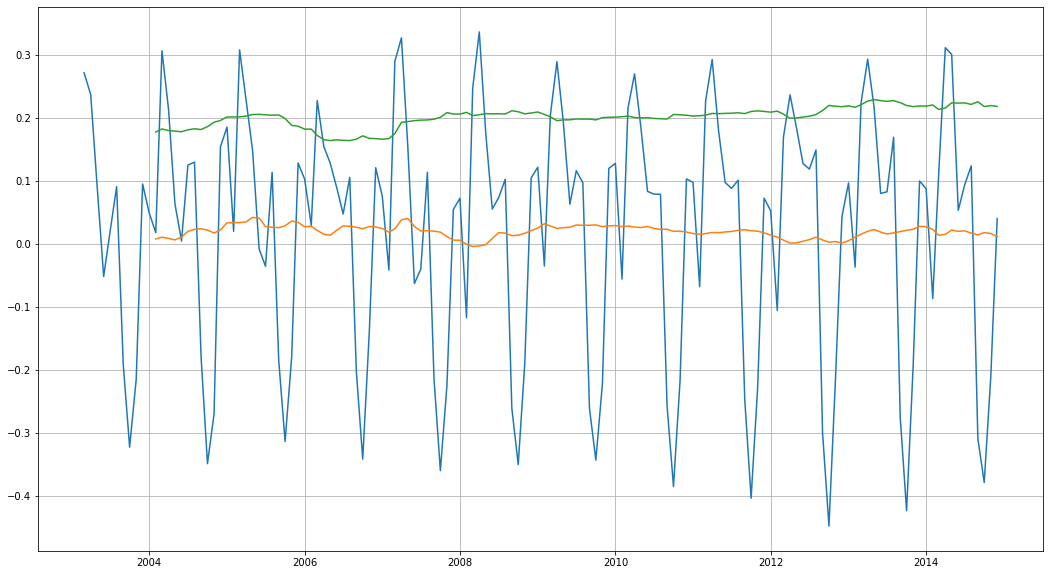

In [ ]:
log_diff_data1=np.log(ts_sales).diff(periods=2).dropna()
test_stationary(log_diff_data1)

In [ ]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

In [ ]:
d=ts_sales.diff(10)

In [ ]:
d.mean()

38.014925373134325

In [ ]:
d.dropna()

2003-11-01     -3.0
2003-12-01      8.0
2004-01-01    -40.0
2004-02-01    -31.0
2004-03-01     -6.0
              ...  
2014-08-01    335.0
2014-09-01    159.0
2014-10-01     14.0
2014-11-01     -6.0
2014-12-01     85.0
Freq: MS, Name: Tractor-Sales, Length: 134, dtype: float64

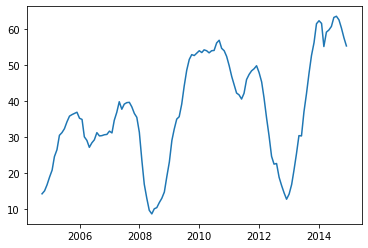

In [ ]:
plt.plot(d.rolling(window=12).mean())

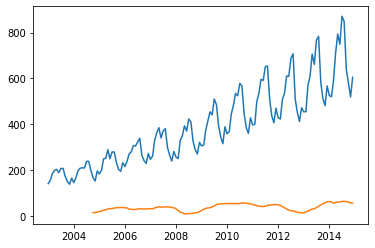

In [ ]:
plt.plot(ts_sales)
plt.plot(d.rolling(window=12).mean())

In [ ]:
#Analysis
ts_sales.rolling(window=4).std()

2003-01-01           NaN
2003-02-01           NaN
2003-03-01           NaN
2003-04-01     26.299556
2003-05-01     20.816660
                 ...    
2014-08-01     54.968931
2014-09-01    105.561988
2014-10-01    146.066195
2014-11-01    142.816899
2014-12-01     50.959952
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: float64

In [ ]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

In [ ]:
ts_sales.rolling(window=4).mean().head(20)

2003-01-01       NaN
2003-02-01       NaN
2003-03-01       NaN
2003-04-01    170.50
2003-05-01    186.00
2003-06-01    194.00
2003-07-01    199.50
2003-08-01    201.50
2003-09-01    193.50
2003-10-01    183.75
2003-11-01    166.50
2003-12-01    156.00
2004-01-01    149.50
2004-02-01    154.00
2004-03-01    168.75
2004-04-01    179.50
2004-05-01    195.75
2004-06-01    206.00
2004-07-01    216.25
2004-08-01    223.75
Freq: MS, Name: Tractor-Sales, dtype: float64

#analysis month wise
#can you perfrom day wise
#yearly dataset
#plot box plot

10 20 30 40 50 
10 20 40 80 160
t s i + or *

# some preprocessing part 
#difference
#log transform
#for variance
#now difference log data for making time series stats on both mean ad variance

#ARIMA SARIMA
#pcaf acf
#AIC BIC
#MSE
#prediction
#outofbox prediction

#PACF AND ACF

1. Partial Autocorrelation Function
2. Autocorrelation Function


In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

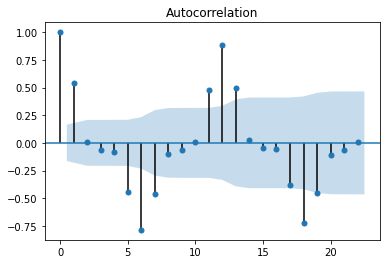

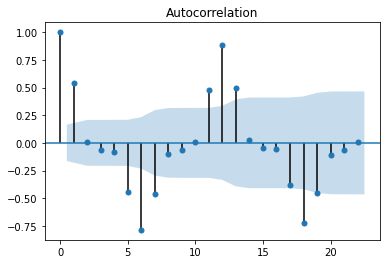

In [ ]:
smt.graphics.plot_acf(log_diff_data1)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


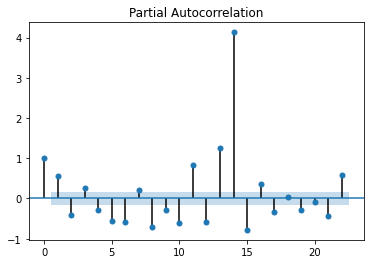

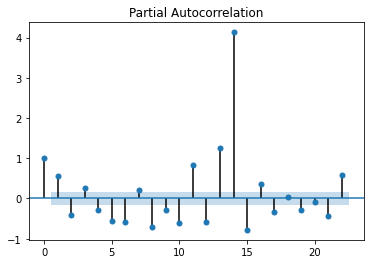

In [ ]:
smt.graphics.plot_pacf(log_diff_data1)

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.9 MB/s 
     |████████████████████████████████| 9.8 MB 9.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(dataset,order=(1,1,1))
model.fit()
model.forecast()

ValueError: ignored

In [ ]:
#mse
np.sqrt(mean_squared_error(y,prediction))

NameError: ignored

#ARIMA
#p,d,q
#p=auto regression
#d= differencing
#q= moving avearge

In [ ]:
def arima_model(X,y,arima_order):
    history=[i for i in X]
    prediction=list()
    for i in range(len(y)):
        model=ARIMA(data,order=())
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        prediction.append(yhat)
        history.append(y[t])
    mse=np.sqrt(mean_squared_error(y,prediction))
    return mse

In [ ]:
def evalute_arima_model(p_value,d_value,q_value):
    for i in p_value:
        for j in d_value:
            for k in q_value:
                order=(i,j,k)
                rmse=arima_model(dataset,test,order)
                try:
                    if rmse<best_score:
                    best_score,best_cfg=rmse,order
                    print(rmse,order)
                except:
                    continue


In [ ]:
p_value=range(0,2)
d_value=range(0,2)
q_value=range(0,2)

In [ ]:
len(ts_sales)
#12 month
#Take last two year data  as test data that is 24 month
#144-24=120

144

In [ ]:
train_data=log_diff_data1[:120]
test_data=log_diff_data1[120:]

In [ ]:
evaluate_arima_model(train_data, test_data, p_value,d_value,q_value)

0 0 0


NameError: ignored

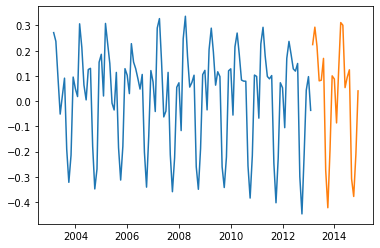

In [ ]:
plt.plot(train_data)
plt.plot(test_data)